In [772]:
import numpy as np
import scipy.io
from tqdm import tnrange, tqdm_notebook
import pandas as pd
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [773]:
path = "data.mat" 
data = scipy.io.loadmat(path)
data_X = data["X"]
data_y = data["y"].reshape((6000,))
data_t = data["X_test"]
print(data_y)

[0. 1. 0. ... 0. 0. 0.]


In [774]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost(w,lam):
    s = sigmoid(np.dot(X_train,w0))
    y = y_train
    return lam * np.linalg.norm(w,ord=2) \
        - sum(y*np.log(s)+(1-y)*np.log(1-s))

In [775]:
one = np.ones(6000)
data_X = np.column_stack((one,data_X))
one = np.ones(497)
data_t = np.column_stack((one,data_t))

In [752]:
X_train = data_X[0:5000]
y_train = data_y[0:5000]
X_validate = data_X[5000:6000]
y_validate = data_y[5000:6000]

In [753]:
print(X_train.shape)

(5000, 13)


In [755]:
lam = 0.1
epi = 0.000001
w0 = np.zeros(13)
Allcost = []

In [756]:
s = sigmoid(np.dot(X_train,w0))
for i in tqdm_notebook(range(20000)):
    w0 = w0 - epi * (2 * lam * w0 \ 
                     - np.matmul(X_train.T,y_train-s))
    s = sigmoid(np.dot(X_train,w0))
    Allcost.append(cost(w0,lam))
    
print(Allcost[-1])
w0


664.70472619889


array([ 0.06912021,  0.85446636,  1.26896844, -0.38979783, -0.15031483,
        0.18845127,  0.03673803, -0.05861698,  0.08519431,  1.09549702,
        0.89099679, -0.64664271, -0.07544602])

In [780]:
# validation
s = sigmoid(np.dot(X_validate,w0))
y = np.where(s>0.5,1,0)
sum(y==y_validate)/y_validate.size

0.987

In [781]:
s = sigmoid(np.dot(X_train,w0))
y = np.where(s>0.5,1,0)
sum(y==y_train)/y_train.size

0.9873333333333333

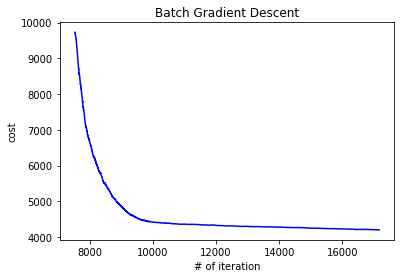

In [771]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Allcost,c="blue")
plt.xlabel("# of iteration")
plt.ylabel("cost")
plt.title("Batch Gradient Descent")
plt.show()

In [760]:
lam = 0.01
epi = 0.000001
w0 = np.ones(13)
Allcost = []
s = sigmoid(np.dot(X_train,w0))
w0 = w0 - epi * (2 * lam * w0  \ 
                 - np.matmul(X_train.T,y_train-s))

In [761]:
for j in range(20):
    shuffle = np.arange(X_train.shape[0])
    np.random.shuffle(shuffle)
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]

    s = sigmoid(np.dot(X_train,w0))
    pred = np.where(s>0.5,1,0)
    index = np.where(pred!=y_train)
    # print(len(index[0]))

    for i in index[0]:
        w0 = w0 - epi * (2*lam*w0 - X_train[i,].T * \
                         (y_train[i] - \
                          sigmoid(np.dot(X_train[i,].T,w0))))
        Allcost.append(cost(w0,lam))


/Users/xuzhihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/xuzhihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [762]:
print(Allcost[-1])
w0

4203.8182363069545


array([ 0.98748506,  0.91948041,  0.9973006 ,  0.99548446,  0.9101857 ,
        0.99927577,  0.54598668, -0.48987923,  0.98757335,  0.96138626,
        0.99443415,  0.8661378 ,  0.99220328])

In [763]:
# validation
s = sigmoid(np.dot(X_validate,w0))
y = np.where(s>0.5,1,0)
sum(y==y_validate)/y_validate.size

0.912

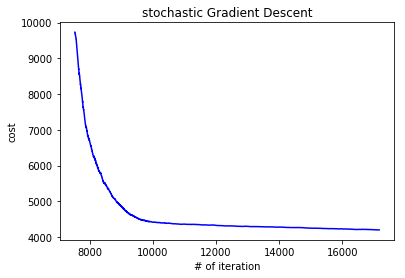

In [766]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(range(1,len(Allcost)+1))
plt.plot(x,Allcost,c="blue")
plt.xlabel("# of iteration")
plt.ylabel("cost")
plt.title("stochastic Gradient Descent")
plt.show()

In [557]:
s = sigmoid(np.dot(X_train,w0))
y = np.where(s>0.5,1,0)
sum(y==y_train)/y_train.size

0.9072

In [627]:
# 3
lam = 0.01
epi0 = 0.01
w0 = np.ones(13)
Allcost = []
s = sigmoid(np.dot(X_train,w0))
w0 = w0 - epi * (2 * lam * w0 - np.matmul(X_train.T,y_train-s))
t = 1
for j in range(20):
    shuffle = np.arange(X_train.shape[0])
    np.random.shuffle(shuffle)
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]

    s = sigmoid(np.dot(X_train,w0))
    pred = np.where(s>0.5,1,0)
    index = np.where(pred!=y_train)
    # print(len(index[0]))

    for i in index[0]:
        epi = epi0/t
        t += 1
        w0 = w0 - epi * (2*lam*w0 - X_train[i,].T * \
                         (y_train[i] - \
                          sigmoid(np.dot(X_train[i,].T,w0))))
        Allcost.append(cost(w0,lam))

/Users/xuzhihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/xuzhihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


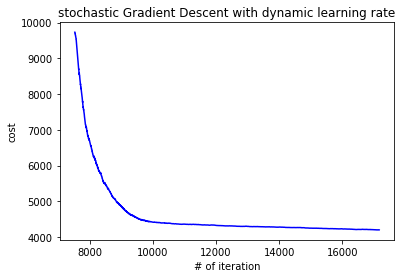

In [768]:
x = list(range(1,len(Allcost)+1))
plt.plot(x,Allcost,c="blue")
plt.xlabel("# of iteration")
plt.ylabel("cost")
plt.title("stochastic Gradient Descent with dynamic learning rate")
plt.show()

In [778]:
# 4
X_train = data_X[0:6000]
y_train = data_y[0:6000]
lam = 0.1
epi = 0.000001
w0 = np.zeros(13)

In [784]:
s = sigmoid(np.dot(X_train,w0))
for i in tqdm_notebook(range(200000)):
    w0 = w0 - epi * (2 * lam * w0 - np.matmul(X_train.T,y_train-s))
    s = sigmoid(np.dot(X_train,w0))
    
print(cost(w0,lam))
w0

322.1697449747901


array([-9.92249995,  0.87525725, 10.45748972, -0.09494907, -0.1360978 ,
        9.79187698,  0.04754474, -0.06267716, -8.89271274,  4.48054233,
        8.47941252, -0.7003933 , -0.37833007])

In [785]:
s = sigmoid(np.dot(data_t,w0))
y = np.where(s>0.5,1,0)
results_to_csv(y)

In [782]:
print(cost(w0,lam))

322.1697449756668
